# Analyse exploratoire, traitements, modélisation des données

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.float_format", lambda x: f"{x :.2f}")
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("Maladies_Cardiaques.csv", sep = ",")
df.drop(columns=['Unnamed: 0'], inplace=True)
df = df.reset_index().rename(columns={'index': 'id'})

In [4]:
display(df.head())
display(df.shape)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


(303, 15)

## 1 - Exploration des données

#### 1.1.1 - Nombre de données, visualisation des colonnes du dataset

In [2]:
# df.to_csv("Maladies_Cardiaques")
# link = 'https://raw.githubusercontent.com/MaskiVal/DataSets/main/heartDisease.csv'
# df = pd.read_csv(link, sep = ",")

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
'''
| Nom de la colonne | Définition                      | Explication de la variable                      |
|-------------------|---------------------------------|-------------------------------------------------|
| age               | Âge du patient                  | L'âge est utilisé pour évaluer le risque.       |
| sex               | Sexe du patient                 | 1 pour masculin, 0 pour féminin.                |
| cp                | Type de douleur thoracique      | 4 valeurs possibles, de 1 à 4.                  |
| trestbps          | Pression artérielle au repos    | Mesurée en mm Hg au moment de l'admission.      |
| chol              | Cholestérol sérique             | Mesuré en mg/dl.                                |
| fbs               | Glycémie à jeun                 | 1 si > 120 mg/dl, 0 sinon.                      |
| restecg           | Résultats électrocardiographiques au repos | 0 = normal; 1 = ayant des anomalies ST-T; 2 = montrant une hypertrophie ventriculaire probable ou certaine. |
| thalach           | Fréquence cardiaque maximale atteinte | Mesurée en battements par minute.             |
| exang             | Angine induite par l'exercice   | 1 = oui; 0 = non.                               |
| oldpeak           | Dépression du segment ST induite par l'exercice par rapport au repos | Mesurée en mm.        |
| slope             | Pente du segment ST d'exercice  | 1 = montant; 2 = plat; 3 = descendant.          |
| ca                | Nombre de vaisseaux principaux colorés par fluoroscopie | 0-4 vaisseaux.         |
| thal              | Thalassémie                     | 3 = normal; 6 = défaut fixe; 7 = défaut réversible. |
| target            | Diagnostic de maladie cardiaque | 1 = maladie; 0 = pas de maladie.
'''

#### 1.1.2 - Observation des types de données

In [6]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 303    │ │ int32       │ 13    │                                                          │
│ │ Number of columns │ 14     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean     ┃ sd       ┃ p0    ┃ p25     ┃ p50  ┃ p75     ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ age             │    0 │      0 │    54.37 │    9.082 │    29 │    47.5 │   55 │      61 │    77 │ ▁▃▅▇▅▁  │  │
│ │ sex             │    0 │      0 │   0.6832 │    0.466 │     0 │       0 │    1 │       1 │     1 │ ▃    ▇  │  │
│ │ cp              │    0 │      0 │    0.967 │    1.032 │     0 │       0 │    1 │       2 │     3 │ ▇ ▃ ▅▁  │  │
│ │ trestbps        │    0 │      0 │    131.6 │    17.54 │    94 │     120 │  130 │     140 │   200 │  ▃▇▇▃▁  │  │
│ │ chol            │    0 │      0 │    246.3 │    51.83 │   126 │     211 │  240 │   274.5 │   564 │   ▂▇▃   │  │
│ │ fbs             │    0 │      0 │   0.1485 │   0.3562 │     0 │       0 │    0 │       0 │     1 │ ▇    ▁  │  │
│ │ restecg         │    0 │      0 │   0.5281 │   0.5259 │     0 │       0 │    1 │       1 │     2 │  ▇  ▇   │  │
│ │ thalach         │    0 │      0 │    149.6 │    22.91 │    71 │   133.5 │  153 │     166 │   202 │  ▂▃▇▇▁  │  │
│ │ exang           │    0 │      0 │   0.3267 │   0.4698 │     0 │       0 │    0 │       1 │     1 │ ▇    ▃  │  │
│ │ oldpeak         │    0 │      0 │     1.04 │    1.161 │     0 │       0 │  0.8 │     1.6 │   6.2 │  ▇▃▁▁   │  │
│ │ slope           │    0 │      0 │    1.399 │   0.6162 │     0 │       1 │    1 │       2 │     2 │ ▁  ▇ ▇  │  │
│ │ ca              │    0 │      0 │   0.7294 │    1.023 │     0 │       0 │    0 │       1 │     4 │  ▇▃ ▂▁  │  │
│ │ thal            │    0 │      0 │    2.314 │   0.6123 │     0 │       2 │    2 │       3 │     3 │   ▁ ▇▆  │  │
│ │ target          │    0 │      0 │   0.5446 │   0.4988 │     0 │       0 │    1 │       1 │     1 │ ▇    ▇  │  │
│ └─────────────────┴──────┴────────┴──────────┴──────────┴───────┴─────────┴──────┴─────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### 1.1.3 - Observation des valeurs Null

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 1.2 - Observation des variables numériques

#### 1.2.1 - Analyse de la distribution

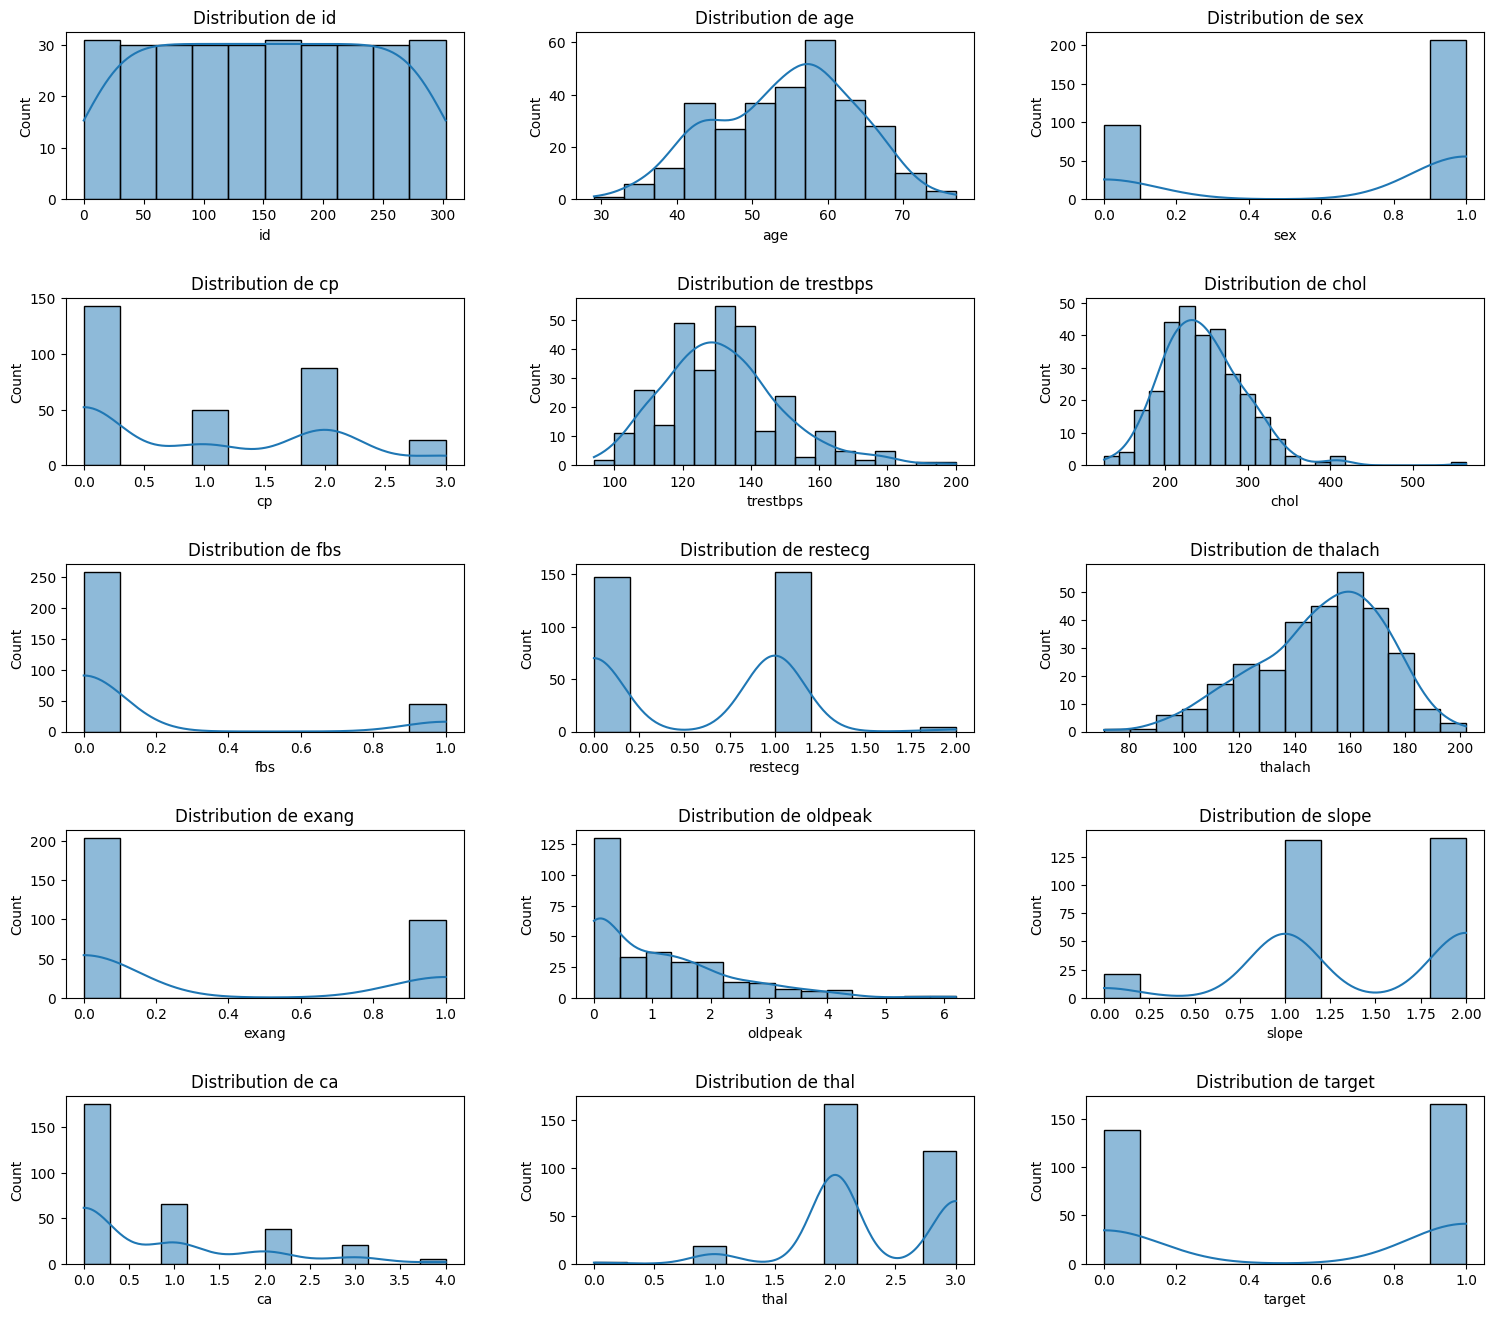

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 14))
fig.tight_layout(pad=5.0)
columns = df.columns
for ax, col in zip(axes.flatten(), columns):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution de {col}')
plt.show()

#### 1.2.2 - Analyse statique descriptive de base

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [8]:
display(df["thal"].value_counts())
display(df["thal"].describe())

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

count   303.00
mean      2.31
std       0.61
min       0.00
25%       2.00
50%       2.00
75%       3.00
max       3.00
Name: thal, dtype: float64

In [9]:
display(df[df["target"] == 0])
display(df[df["target"] == 1])

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,165,67,1,0,160,286,0,0,108,1,1.50,1,3,2,0
166,166,67,1,0,120,229,0,0,129,1,2.60,1,2,3,0
167,167,62,0,0,140,268,0,0,160,0,3.60,0,2,2,0
168,168,63,1,0,130,254,0,0,147,0,1.40,1,1,3,0
169,169,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0
299,299,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0
300,300,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0
301,301,57,1,0,130,131,0,1,115,1,1.20,1,1,3,0


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,160,56,1,1,120,240,0,1,169,0,0.00,0,0,2,1
161,161,55,0,1,132,342,0,1,166,0,1.20,2,0,2,1
162,162,41,1,1,120,157,0,1,182,0,0.00,2,0,2,1
163,163,38,1,2,138,175,0,1,173,0,0.00,2,4,2,1


### 1.3 - Observation des variables catégoritielles

#### 1.3.1 - Analyse du nombre de valeurs unique

In [11]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

#### 1.3.2 - Analyse des  statistique de base

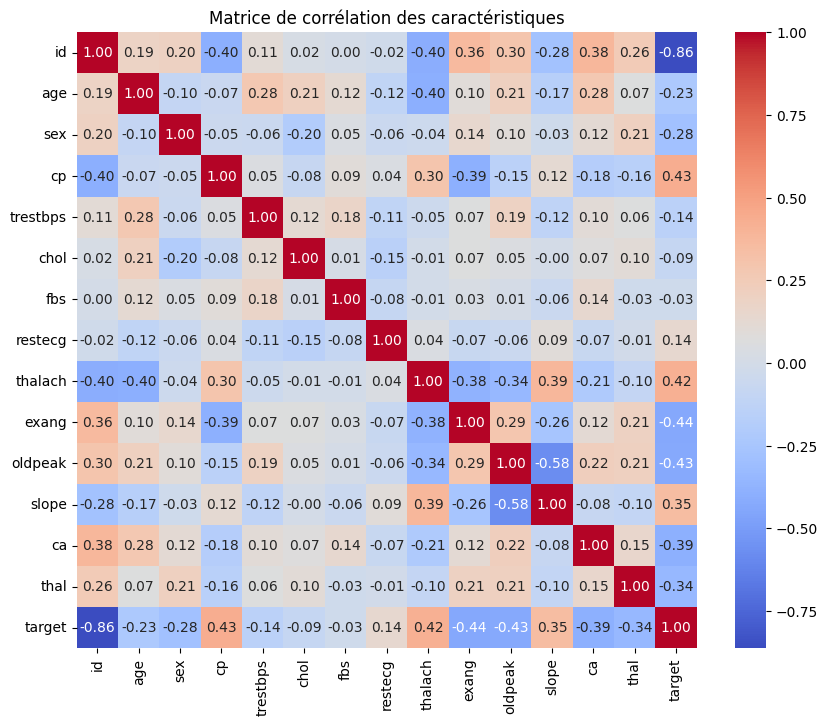

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de corrélation des caractéristiques')
plt.show()


## 2 - Nettoyage des données

### 2.1 - Traitement des valeurs manquantes

In [16]:
valeurs_manquantes = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(valeurs_manquantes)


Valeurs manquantes par colonne :
id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### 2.2 - Traitement des doublons

In [17]:
df.duplicated(keep=False).sum()

0

In [18]:
df[df.duplicated(keep=False)]

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


### 2.3 - Traitement des valeurs abérantes

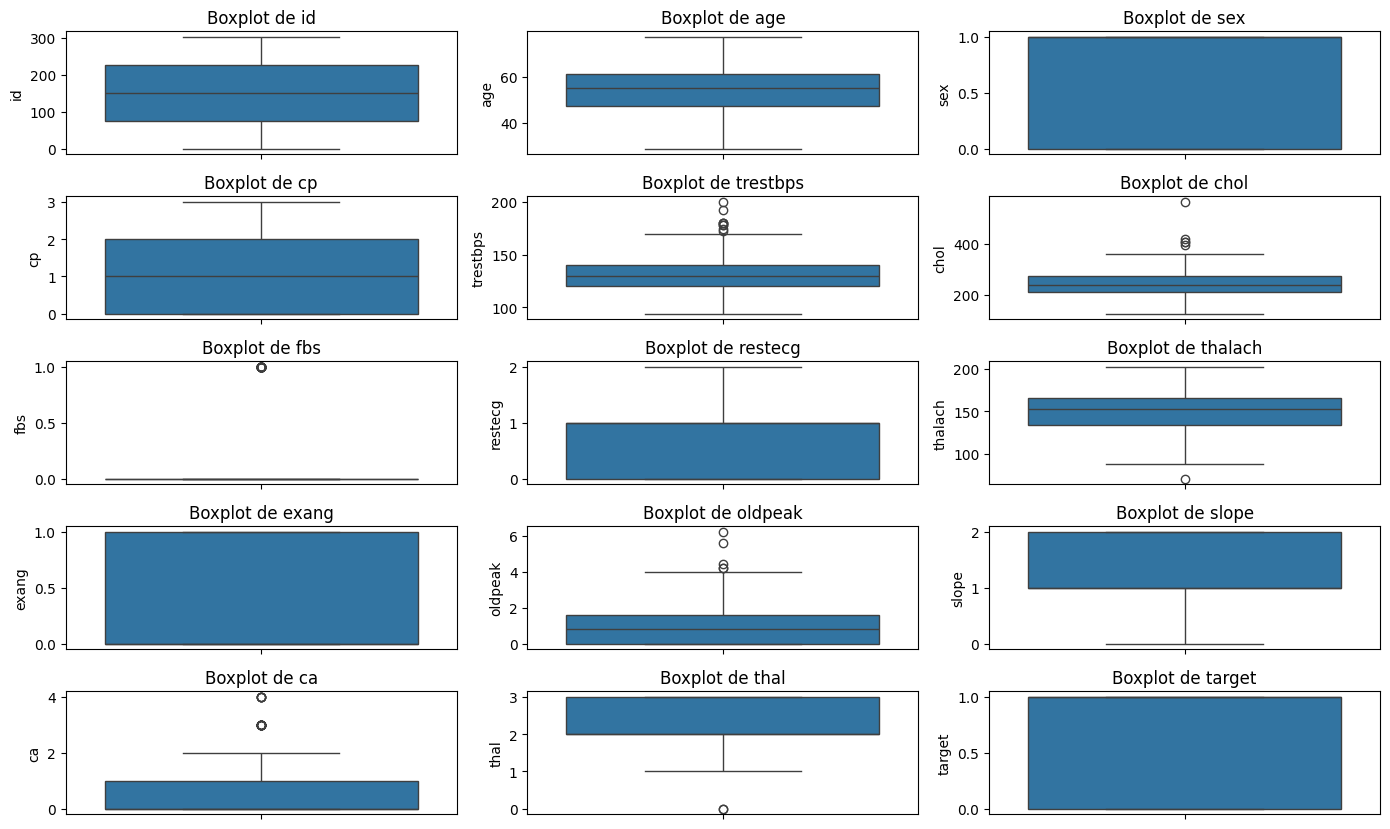

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

colonnes_numeriques = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(14, 10))  # Vous pouvez ajuster la taille globale ici
for i, col in enumerate(colonnes_numeriques):
    plt.subplot(len(colonnes_numeriques) // 3 + 1, 3, i + 1)  # Organise les plots en grille
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


In [14]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Report")
# profile

## 3 - Validation statistique pour l'interpretabilité des résultats

### 3.1 - Distribution en fonction de target

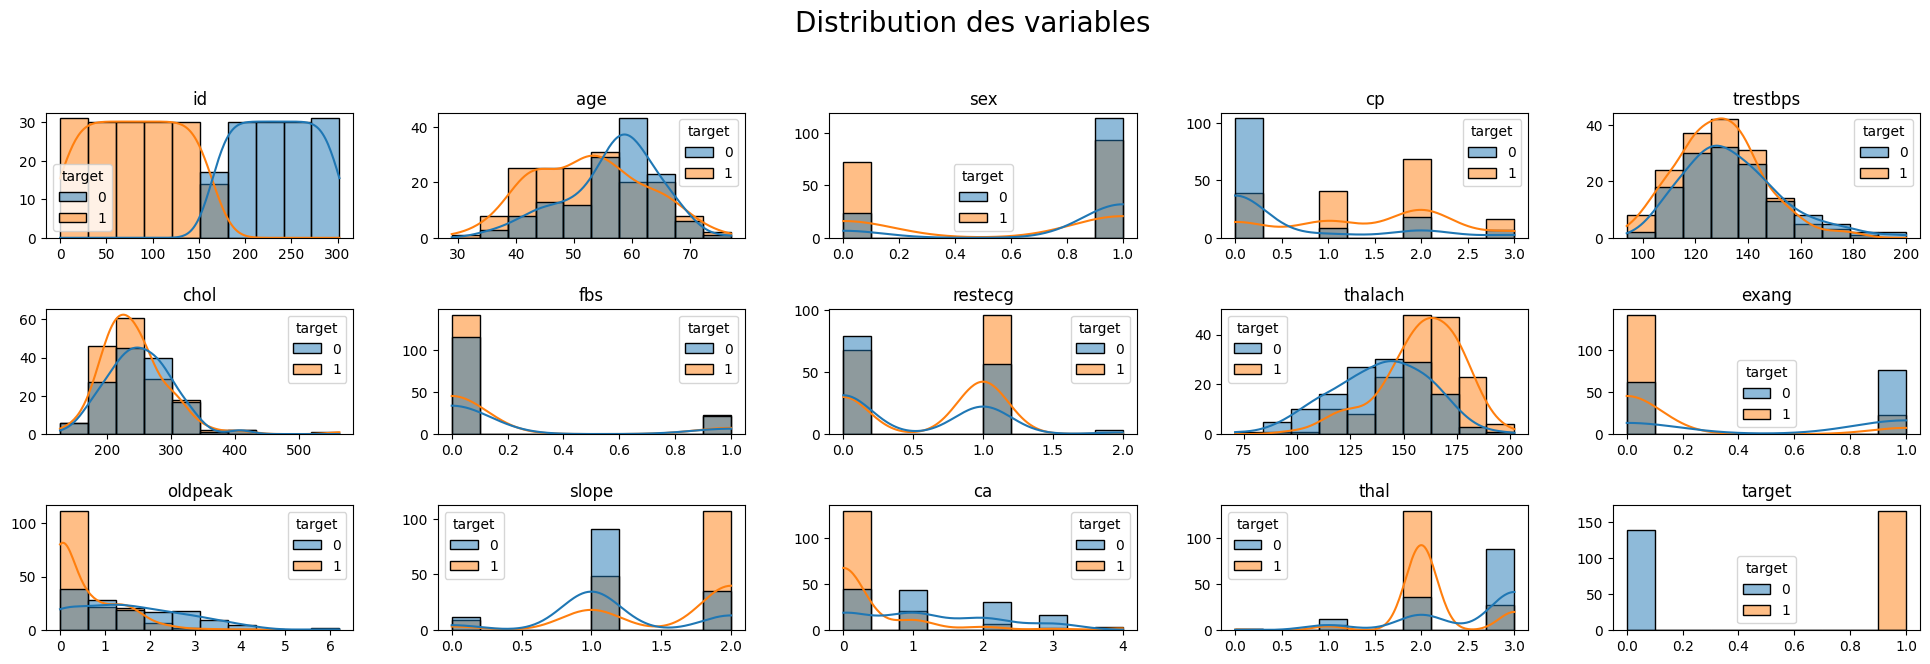

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 5, figsize=(20, 7))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df[1:]):
    sns.histplot(df, x=col, hue='target', bins='sturges', kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

plt.show()

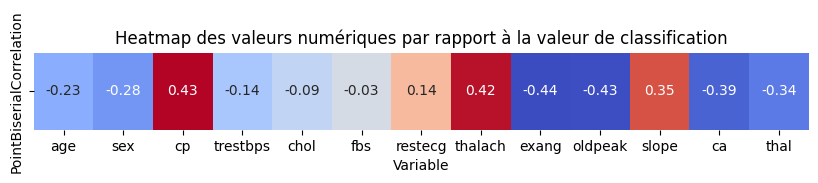

In [8]:
from scipy.stats import kruskal, pointbiserialr
continuous_cols = df.iloc[:,1:-1]

# Calculer la corrélation bisériale ponctuelle pour chaque variable continue
correlations = {}
for col in continuous_cols.columns:
    correlations[col] = pointbiserialr(df['target'], df[col])[0]

# Convertir le dictionnaire en DataFrame pour la heatmap
corr_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'PointBiserialCorrelation'])
corr_df.set_index('Variable', inplace=True)

plt.figure(figsize=(10, 1))
sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', cbar=False, fmt=".2f")
plt.title('Heatmap des valeurs numériques par rapport à la valeur de classification')
plt.show()

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Ajouter une colonne constante pour calculer le VIF
X_vif = add_constant(df.drop(["target"], axis=1))

# Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_data

,Variable,VIF
0,const,214.44
1,id,1.64
2,age,1.44
3,sex,1.18
4,cp,1.37
5,trestbps,1.18
6,chol,1.15
7,fbs,1.09
8,restecg,1.06
9,thalach,1.67


In [ ]:
''' Il n'y a pas de multicolinéarité entre les variables'''

### 3.2 - Séparation des dataframe en fonction de target et Test Kruskal-Wallis sur les variables numériques

In [13]:
group1 = df[df['target'] == 0]
group2 = df[df['target'] == 1]

#Visualisation de la taille des echantillons
print(f'taille de l\'echantillon initial sur les dataset')
print(f'target=1 : {len(group1)}')
print(f'target=2 : {len(group2)}\n')

taille de l'echantillon initial sur les dataset
target=1 : 138
target=2 : 165



In [15]:
# Uniformatisation des echantillons

print(f'\nResultat des tests sur les différentes variables\n')

for var_mean in group1.columns[1:]:
    stat, p = kruskal(group1[var_mean], group2[var_mean])

    print('---------------------------------')
    print(f'\nRésultat sur la variable : {var_mean}\n H= {stat:.3f}\n p= {p:.5f}\n')

    #conclusion
    if p > 0.05:
        print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_mean} sont différentes est refusée.\n')
    # else:
    #     print(f'L\'hypothèse selon laquelle les distributions des échantillons de {var_mean} sont différentes est validé.\n')



Resultat des tests sur les différentes variables

---------------------------------

Résultat sur la variable : age
 H= 17.164
 p= 0.00003

---------------------------------

Résultat sur la variable : sex
 H= 23.835
 p= 0.00000

---------------------------------

Résultat sur la variable : cp
 H= 64.142
 p= 0.00000

---------------------------------

Résultat sur la variable : trestbps
 H= 4.465
 p= 0.03460

---------------------------------

Résultat sur la variable : chol
 H= 4.413
 p= 0.03566

---------------------------------

Résultat sur la variable : fbs
 H= 0.238
 p= 0.62599

L'hypothèse selon laquelle les distributions des échantillons de fbs sont différentes est refusée.

---------------------------------

Résultat sur la variable : restecg
 H= 6.670
 p= 0.00981

---------------------------------

Résultat sur la variable : thalach
 H= 55.417
 p= 0.00000

---------------------------------

Résultat sur la variable : exang
 H= 57.609
 p= 0.00000

----------------------------

In [ ]:
''' fbs est > p=0.05 donc n'est pas à prendre en compte pour le ML'''

### 3.3 - Test Chi2 sur les variables catégorielles

In [31]:
from scipy.stats import chi2_contingency

# Sélectionner les colonnes binaires
colonnes_binaires = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal' ]

for col in colonnes_binaires:
    # Créer un tableau de contingence
    tableau_contingence = pd.crosstab(df[col], df['target'])

    # Appliquer le test du Chi2
    stat, p, dof, expected = chi2_contingency(tableau_contingence)


    print('---------------------------------')
    print(
        f'\nRésultat sur la variable : {col}\n H= {stat:.3f}\n p= {p:.5f}'
    )
    #conclusion
    if p > 0.05:
        print(
            f'L\'hypothèse selon laquelle les distributions des échantillons de {col} sont différentes est refusée.\n'
        )

---------------------------------

Résultat sur la variable : sex
 H= 22.717
 p= 0.00000
---------------------------------

Résultat sur la variable : cp
 H= 81.686
 p= 0.00000
---------------------------------

Résultat sur la variable : fbs
 H= 0.106
 p= 0.74443
L'hypothèse selon laquelle les distributions des échantillons de fbs sont différentes est refusée.

---------------------------------

Résultat sur la variable : restecg
 H= 10.023
 p= 0.00666
---------------------------------

Résultat sur la variable : exang
 H= 55.945
 p= 0.00000
---------------------------------

Résultat sur la variable : slope
 H= 47.507
 p= 0.00000
---------------------------------

Résultat sur la variable : ca
 H= 74.367
 p= 0.00000
---------------------------------

Résultat sur la variable : thal
 H= 85.304
 p= 0.00000


## 4 - Modélisation des données

### 4.1 - Encoding des données

In [32]:
df.head(5)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


### 4.2 - Train test split et définition des variables

In [45]:
from sklearn.model_selection import train_test_split

# Séparer les features et la target
X = df.drop(["target", "fbs"], axis=1)
y = df['target']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Créer les transformers pour les colonnes catégorielles et numériques
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [48]:
from sklearn.compose import ColumnTransformer

# Créer le preprocessor pour les colonnes
preprocessor = ColumnTransformer(
    transformers=[('cat', cat_transformer,
                   ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']),
                  ('num', num_transformer,
                   ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])])
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['sex', 'cp', 'restecg', 'exang', 'slope',
                                  'ca', 'thal']),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'trestbps', 'chol', 'thalach',
                                  'oldpeak'])])

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Créer les pipelines pour chaque modèle
pipelines = {
    'Decision Tree':
    Pipeline(steps=[('preprocessor',
                     preprocessor), ('classifier', DecisionTreeClassifier())]),
    'Logistic Regression':
    Pipeline(steps=[('preprocessor',
                     preprocessor), ('classifier', LogisticRegression())]),
    'KNN':
    Pipeline(steps=[('preprocessor',
                     preprocessor), ('classifier', KNeighborsClassifier())]),
    'Random Forest':
    Pipeline(steps=[('preprocessor',
                     preprocessor), ('classifier', RandomForestClassifier())])
}
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'cp', 'restecg',
                                                   'exang', 'slope', 'ca',
                                                   'thal']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak'])])),
                ('classifier', RandomForestClassifier())])

In [58]:
from sklearn.metrics import r2_score, classification_report, confusion_matrix

# Entraîner et évaluer les modèles
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculer le R2 score
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - R2 Score: {r2}")
    print("---------------------------")
    # Afficher d'autres métriques intéressantes
    print(f"{name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print("---------------------------")
    print(f"{name} - Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

Decision Tree - R2 Score: 0.34267241379310354
---------------------------
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

---------------------------
Decision Tree - Confusion Matrix:
[[24  5]
 [ 5 27]]
Logistic Regression - R2 Score: 0.6056034482758621
---------------------------
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

---------------------------
